In [1]:
from importlib import reload
import plot_utils as pu; reload(pu)

<module 'plot_utils' from '/mnt/fs1/ziyxiang/classes/PSYCH209FinalProject/notebooks/plot_utils.py'>

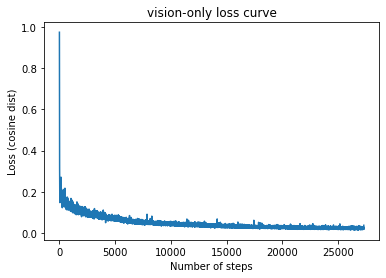

In [2]:
vision_only_path = '/mnt/fs1/ziyxiang/classes/PSYCH209FinalProject/checkpoints/vision-only_190.pth'
pu.plot_loss(vision_only_path)

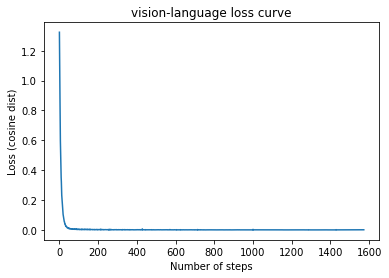

In [5]:
vision_language_path = '/mnt/fs1/ziyxiang/classes/PSYCH209FinalProject/checkpoints/vision-_10.pth'
pu.plot_loss(vision_language_path)